In [11]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
dirname = os.path.abspath(os.curdir)
ozone_csv = pd.read_csv(path.join(os.sep, dirname, 'Monthly mean thickness Dobson units ozone column Arosa Switzerland 192.csv'))

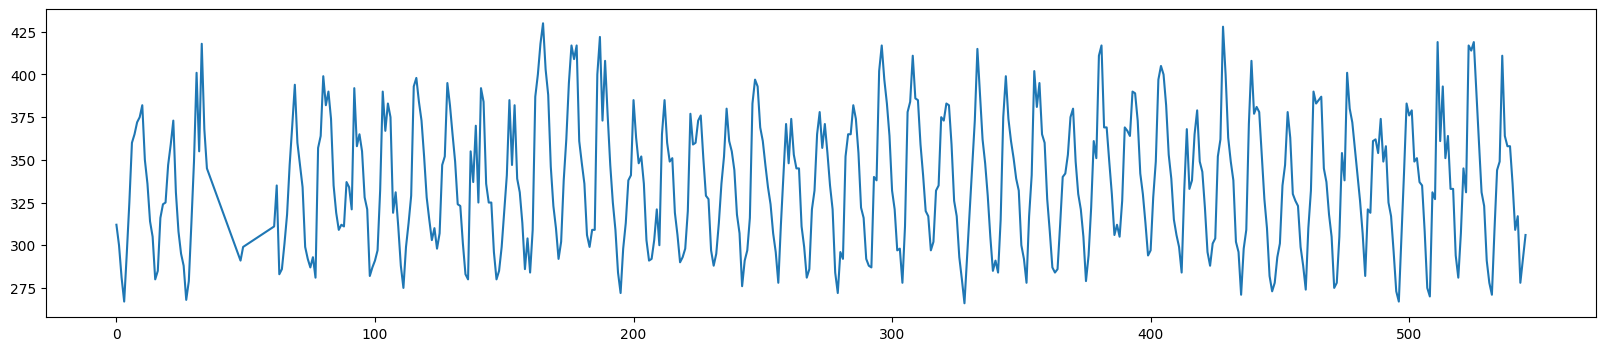

In [20]:
ozone_csv = ozone_csv.interpolate()
plt.figure(figsize=(20, 4))
plt.plot(ozone_csv['x'])
plt.show()

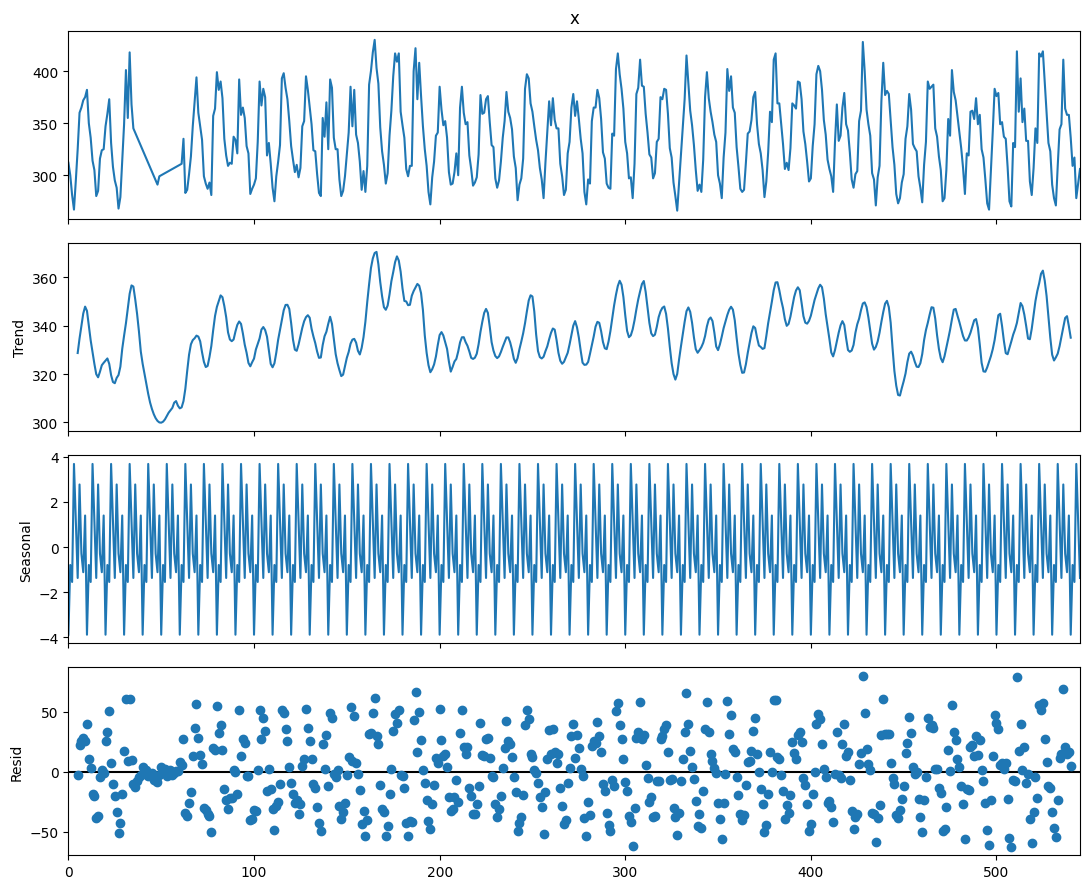

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decompose = seasonal_decompose(ozone_csv["x"], period=10)
decompose.plot()
plt.show()

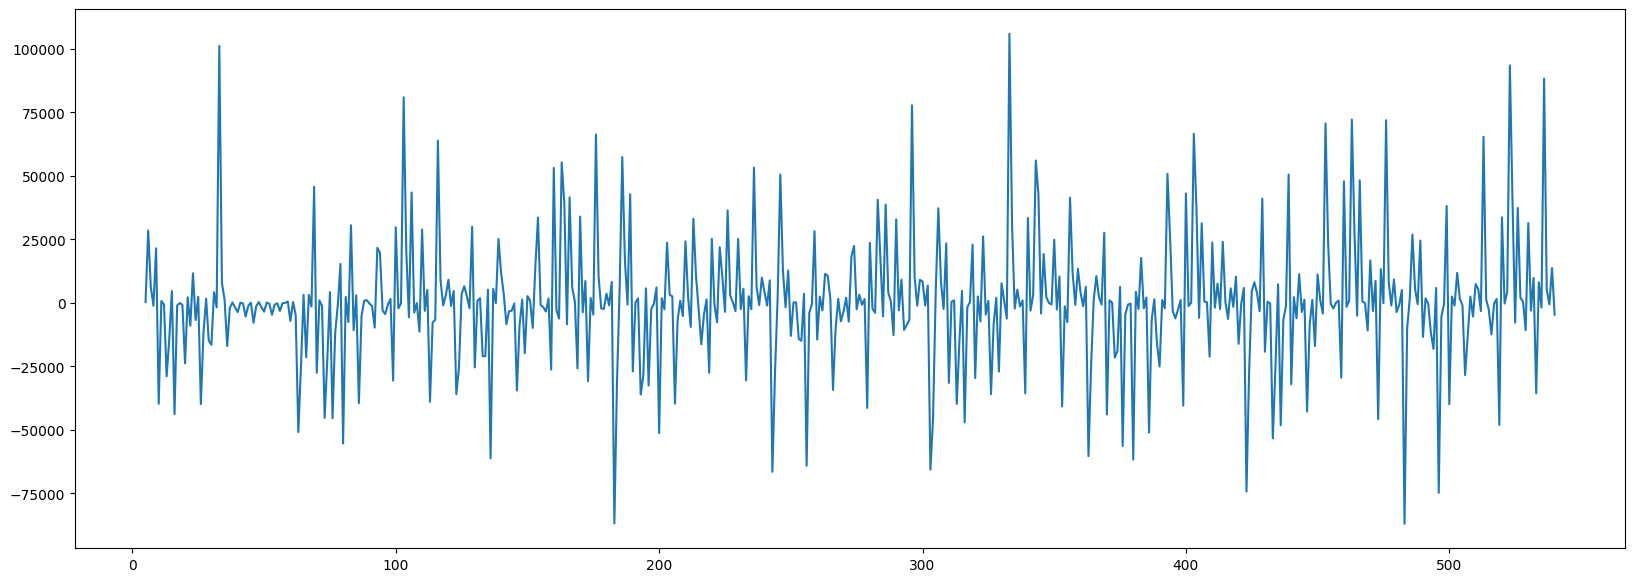

In [28]:
mult_dcmps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 7))
 
plt.plot(mult_dcmps)
plt.show()

<Axes: >

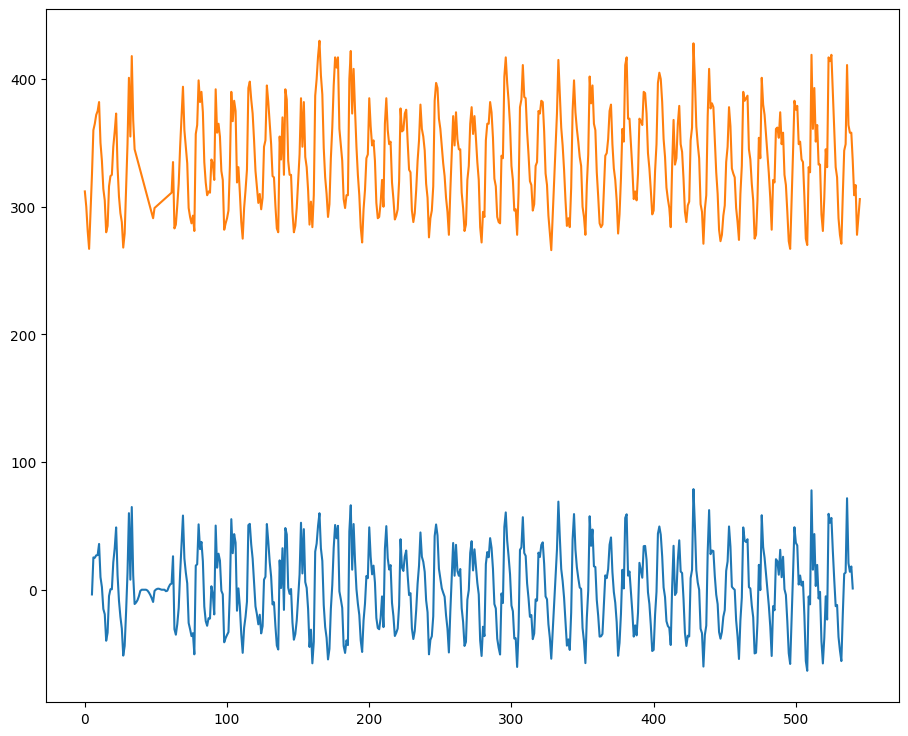

In [31]:
ozone_csv_r = ozone_csv["x"] - decompose.trend
ozone_csv_r.plot()
ozone_csv["x"].plot()

In [34]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Единицы Добсона"
ts = ozone_csv["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Единицы Добсона :
Test Statistic                  -4.677484
p-value                          0.000093
#Lags Used                      14.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


C:\Users\Иван\AppData\Local\Temp\ipykernel_354240\1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


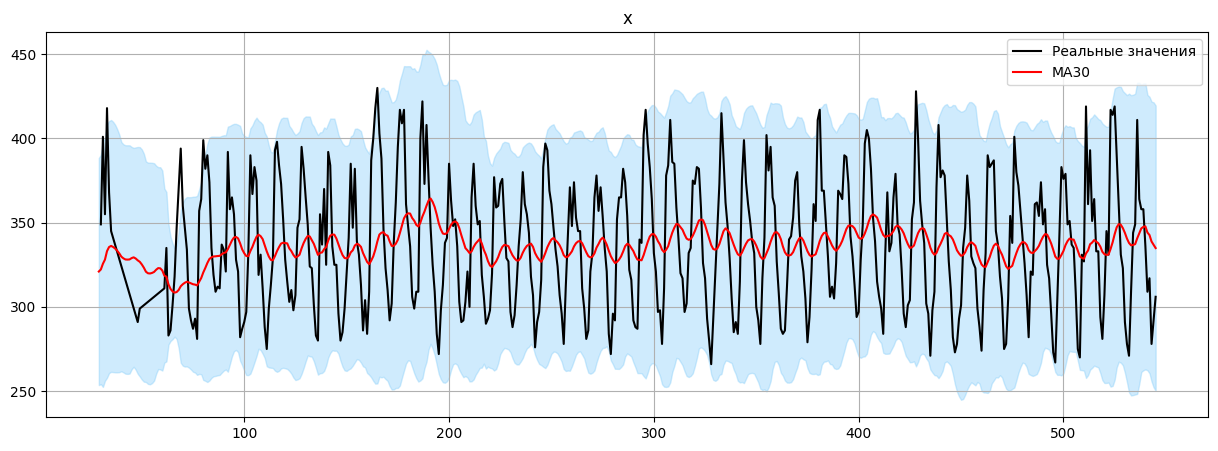

In [35]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

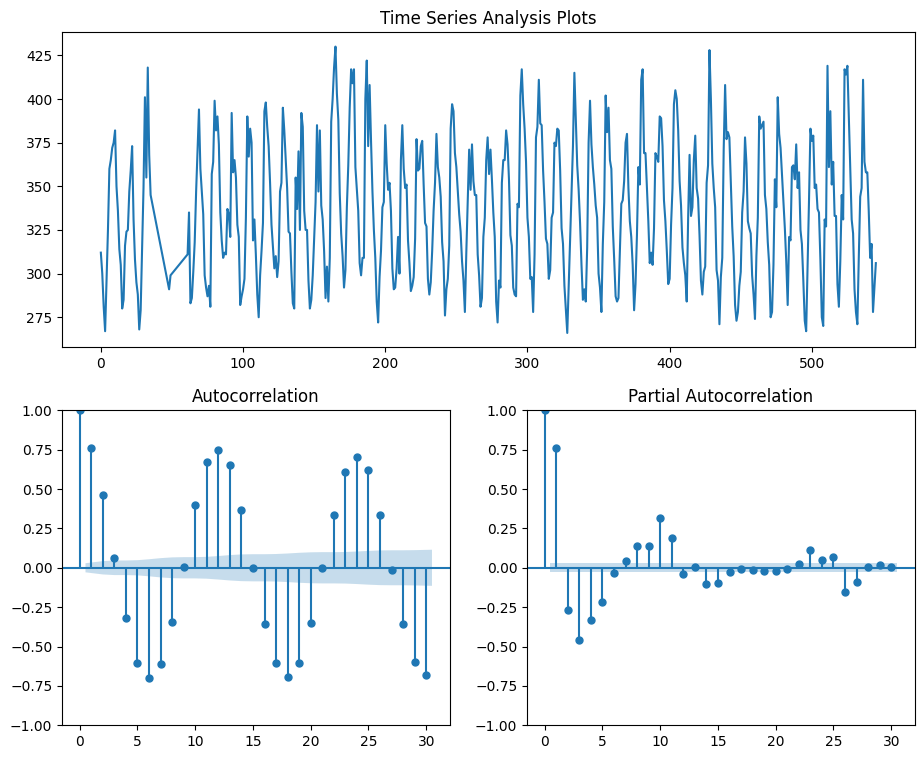

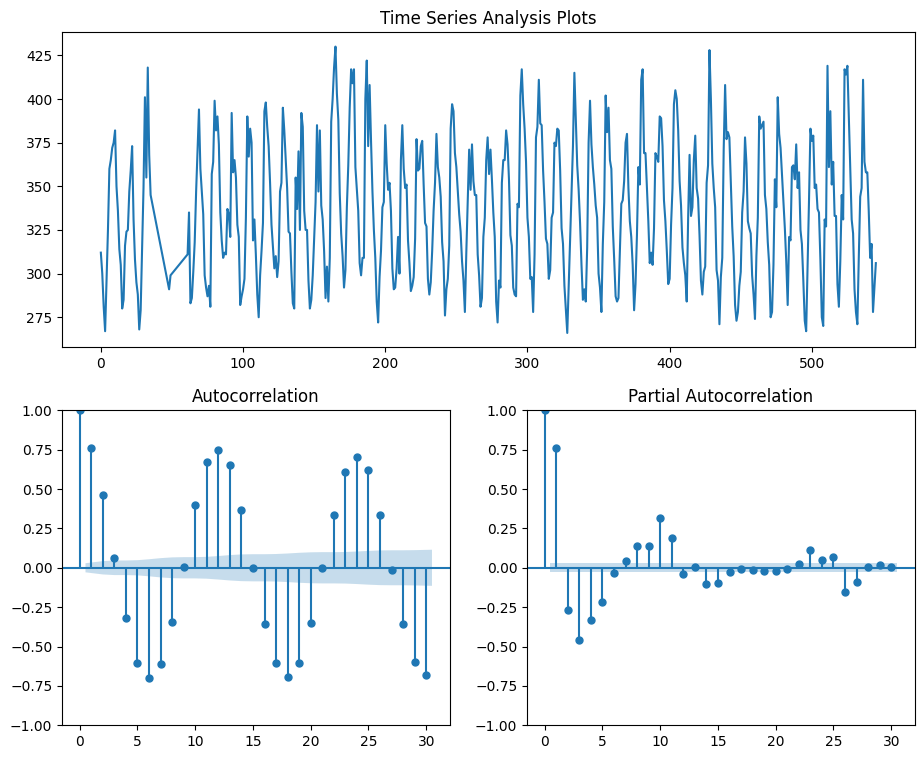

In [36]:
import statsmodels.tsa.api as smt

layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)